In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import folium
import geopandas as gpd
from folium.plugins import HeatMap
from datetime import datetime


In [3]:
data = pd.read_csv("C:/Users/admin/Desktop/chicagao crime/Crime_Data.csv")

In [4]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18,074XX N ROGERS AVE,560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 15:03:40,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 15:06:00,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 15:39:49,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 15:39:49,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,5,1162518.0,1925906.0,2023,11/18/2023 15:39:49,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 15:41:24,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549999 entries, 0 to 549998
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    549999 non-null  int64  
 1   Case Number           549999 non-null  object 
 2   Date                  549999 non-null  object 
 3   Block                 549999 non-null  object 
 4   IUCR                  549999 non-null  object 
 5   Primary Type          549999 non-null  object 
 6   Description           549999 non-null  object 
 7   Location Description  548326 non-null  object 
 8   Arrest                549999 non-null  bool   
 9   Domestic              549999 non-null  bool   
 10  Beat                  549999 non-null  int64  
 11  District              549999 non-null  int64  
 12  Ward                  213674 non-null  float64
 13  Community Area        215093 non-null  float64
 14  FBI Code              549999 non-null  object 
 15  

In [6]:
data.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1673
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    336325
Community Area          334906
FBI Code                     0
X Coordinate              6912
Y Coordinate              6912
Year                         0
Updated On                   0
Latitude                  6912
Longitude                 6912
Location                  6912
dtype: int64

In [7]:
data.drop(['Ward','Community Area'], axis=1, inplace=True)

In [8]:
data['Location Description'].fillna("Unknown", inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12960\2238391514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Location Description'].fillna("Unknown", inplace=True)


In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data['Updated On'] = pd.to_datetime(data['Updated On'])
data['Primary Type'] = data['Primary Type'].astype('category')


In [10]:
#Forward and backward filling

data['Latitude'].fillna(method='ffill', inplace=True)
data['Longitude'].fillna(method='bfill', inplace=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\2505896340.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Latitude'].fillna(method='ffill', inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_12960\2505896340.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Latitude'].fillna(method='ffill', inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_12960\2505896340.py:4: FutureWarning: A value is trying to be set

In [11]:
data['latitude_missing'] = data['Latitude'].isnull().astype(int)
data['longitude_missing'] = data['Longitude'].isnull().astype(int)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549999 entries, 0 to 549998
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    549999 non-null  int64         
 1   Case Number           549999 non-null  object        
 2   Date                  549999 non-null  datetime64[ns]
 3   Block                 549999 non-null  object        
 4   IUCR                  549999 non-null  object        
 5   Primary Type          549999 non-null  category      
 6   Description           549999 non-null  object        
 7   Location Description  549999 non-null  object        
 8   Arrest                549999 non-null  bool          
 9   Domestic              549999 non-null  bool          
 10  Beat                  549999 non-null  int64         
 11  District              549999 non-null  int64         
 12  FBI Code              549999 non-null  object        
 13 

# Preprocessing

In [14]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour
data['weekday'] = data['Date'].dt.day_name()


In [15]:
#outlier Detection

# Example: Capping latitude outliers
q1 = data['Latitude'].quantile(0.25)
q3 = data['Latitude'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['Latitude'] >= lower_bound) & (data['Latitude'] <= upper_bound)]
print (data)


              ID Case Number                Date                      Block  \
1          25953    JE240540 2021-05-24 15:06:00        020XX N LARAMIE AVE   
2          26038    JE279849 2021-06-26 09:24:00      062XX N MC CORMICK RD   
3       13279676    JG507211 2023-11-09 07:30:00           019XX W BYRON ST   
4       13274752    JG501049 2023-11-12 07:59:00  086XX S COTTAGE GROVE AVE   
5        1930689    HH109118 2002-01-05 21:24:00             007XX E 103 ST   
...          ...         ...                 ...                        ...   
549994   1715153     G516233 2001-08-27 23:00:00       036XX S LAKE PARK AV   
549995   1799889     G625392 2001-10-16 16:30:00         065XX S STEWART AV   
549996   1769834     G583569 2001-09-29 05:35:00    031XX N CENTRAL PARK AV   
549997   1788327     G610965 2001-09-12 09:05:00          065XX S CICERO AV   
549998   1810693     G627247 2001-10-18 17:34:00       053XX W FERDINAND ST   

        IUCR         Primary Type  \
1        110  

In [16]:
data['X Coordinate'].fillna(data['X Coordinate'].mean(), inplace=True)
data['Y Coordinate'].fillna(data['Y Coordinate'].mean(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3590690205.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['X Coordinate'].fillna(data['X Coordinate'].mean(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3590690205.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

# Exploratory Data Analysis

In [18]:
print(data.describe(include='all'))


                  ID Case Number                           Date  \
count   5.499580e+05      549958                         549958   
unique           NaN      549393                            NaN   
top              NaN    HJ590004                            NaN   
freq             NaN           6                            NaN   
mean    5.748745e+06         NaN  2009-10-05 06:53:28.887302400   
min     6.340000e+02         NaN            2001-01-01 00:00:00   
25%     1.477710e+06         NaN            2001-04-21 02:00:00   
50%     1.651366e+06         NaN            2001-08-04 18:30:00   
75%     1.327663e+07         NaN            2023-11-07 23:37:00   
max     1.348547e+07         NaN            2024-05-30 00:00:00   
std     5.669914e+06         NaN                            NaN   

                   Block    IUCR Primary Type Description  \
count             549958  549958       549958      549958   
unique             50984     356           34         449   
top     100X

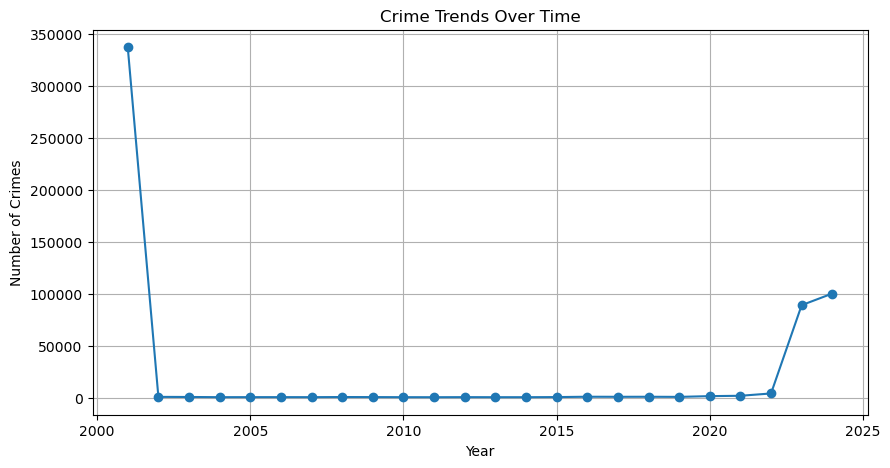

In [19]:
crime_trends = data.groupby('Year').size()
plt.figure(figsize=(10, 5))
plt.plot(crime_trends.index, crime_trends.values, marker='o')
plt.title('Crime Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid()
plt.show()

In [20]:
# Top 10 Primary Types

top_crimes = data['Primary Type'].value_counts().head(10)
print(top_crimes)


Primary Type
THEFT                  112771
BATTERY                101006
CRIMINAL DAMAGE         60216
ASSAULT                 40049
NARCOTICS               39571
MOTOR VEHICLE THEFT     37215
OTHER OFFENSE           33893
DECEPTIVE PRACTICE      24225
BURGLARY                23380
ROBBERY                 21068
Name: count, dtype: int64


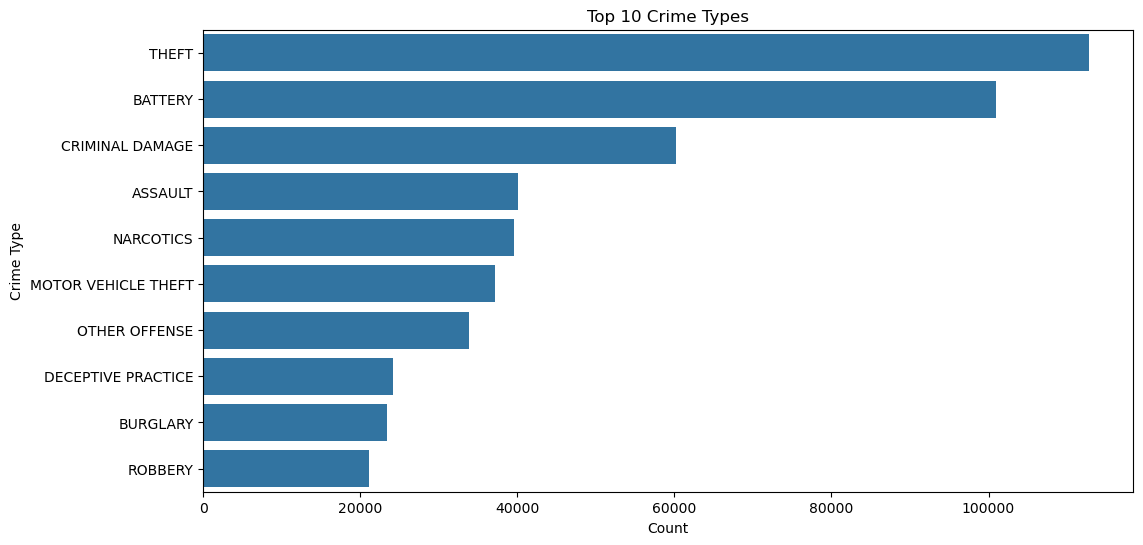

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Primary Type', data=data, order=data['Primary Type'].value_counts().index[:10])
plt.title('Top 10 Crime Types')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()

In [22]:
# Top 10 Locations
top_locations = data['Location Description'].value_counts().head(10)
print(top_locations)

Location Description
STREET                            166041
RESIDENCE                          90194
APARTMENT                          58755
SIDEWALK                           30151
OTHER                              14864
ALLEY                              12827
SMALL RETAIL STORE                 11671
PARKING LOT/GARAGE(NON.RESID.)     11234
RESTAURANT                          9328
DEPARTMENT STORE                    8377
Name: count, dtype: int64


In [23]:
# Arrest Rate
arrest_rate = data['Arrest'].mean()
print(f'Arrest Rate: {arrest_rate:.2%}')




Arrest Rate: 23.76%


In [25]:
# Extract additional time-related features
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = data['Date'].dt.hour
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Season'] = data['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else \
                                   'Spring' if x in [3, 4, 5] else \
                                   'Summer' if x in [6, 7, 8] else 'Fall')


In [27]:
# Domestic Incidents
domestic_cases = data['Domestic'].value_counts(normalize=True)
print(domestic_cases)

Domestic
False    0.832356
True     0.167644
Name: proportion, dtype: float64


# Geospatial Analysis

In [29]:
# Create a base map
crime_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=11)

# Add a heatmap layer
heat_data = data[['Latitude', 'Longitude']].dropna()
HeatMap(heat_data.values, radius=10).add_to(crime_map)

# Save and display the map
crime_map.save("crime_heatmap.html")
print("Heatmap saved as crime_heatmap.html")

Heatmap saved as crime_heatmap.html


# Analyze arrest rates and domestic vs non-domestic incidents.

In [80]:
arrest_rate = data.groupby('Primary Type')['Arrest'].mean().reset_index()
arrest_rate.columns = ['CrimeType', 'ArrestRate']
arrest_rate.to_csv('arrest_rate_by_crime.csv', index=False)

# Domestic vs Non-Domestic Crimes
domestic_crime = data['Domestic'].value_counts().reset_index()
domestic_crime.columns = ['Domestic', 'Count']
domestic_crime.to_csv('domestic_crime.csv', index=False)

print("Arrest and domestic incident datasets saved.")

C:\Users\admin\AppData\Local\Temp\ipykernel_12960\1026367020.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arrest_rate = data.groupby('Primary Type')['Arrest'].mean().reset_index()


Arrest and domestic incident datasets saved.


# Location-Specific Analysis

In [86]:
# Common Crime Locations
location_crime = data['Location Description'].value_counts().reset_index()
location_crime.columns = ['LocationDescription', 'CrimeCount']
location_crime.to_csv('common_crime_locations.csv', index=False)

# Crime by Beat and block
crime_by_beat = data.groupby('Beat').size().reset_index(name='CrimeCount')
crime_by_block = data.groupby('Block').size().reset_index(name='CrimeCount')

crime_by_beat.to_csv('crime_by_beat.csv', index=False)
crime_by_block.to_csv('crime_by_block.csv', index=False)

print("Location-specific datasets saved.")


Location-specific datasets saved.


# Analyze repeat crime locations and offenders.

In [88]:
repeat_crime_locations = data.groupby(['Latitude', 'Longitude']).size().reset_index(name='CrimeCount')
repeat_crime_locations = repeat_crime_locations[repeat_crime_locations['CrimeCount'] > 5]
repeat_crime_locations.to_csv('repeat_crime_locations.csv', index=False)

print("Repeat crime location dataset saved.")


Repeat crime location dataset saved.


In [30]:
correlation = data[['Beat', 'District','Year']].corr()
print(correlation)


              Beat  District      Year
Beat      1.000000  0.930278 -0.043114
District  0.930278  1.000000  0.003976
Year     -0.043114  0.003976  1.000000


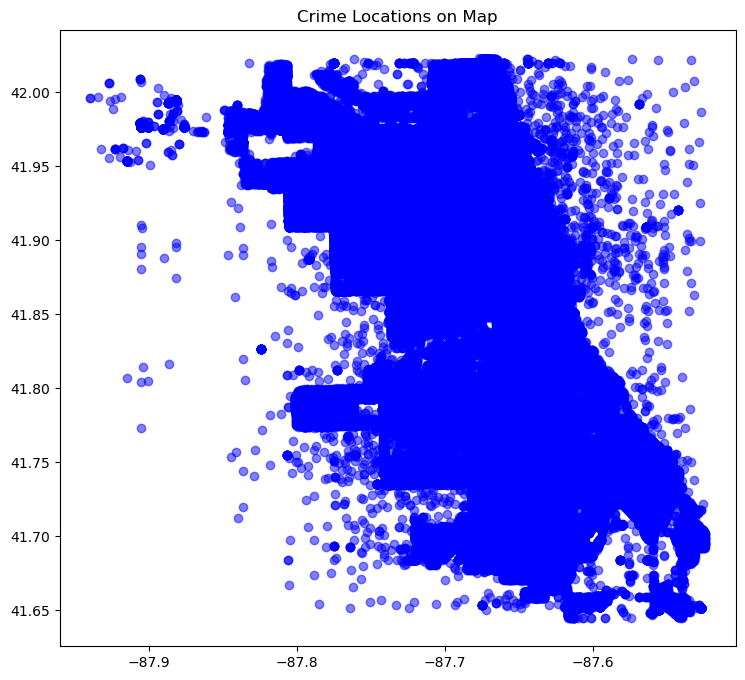

In [31]:
# Geographic Analysis
geo_data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))
geo_data.plot(figsize=(12, 8), color='blue', alpha=0.5)
plt.title('Crime Locations on Map')
plt.show()

In [32]:
data.drop_duplicates(inplace=True)


In [33]:
data.to_csv("cleanedcrime_data.csv", index=False)


In [34]:
cleanedcrime_data = pd.read_csv("C:/Users/admin/Desktop/chicagao crime/cleanedcrime_data.csv")

In [35]:
cleanedcrime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549958 entries, 0 to 549957
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    549958 non-null  int64  
 1   Case Number           549958 non-null  object 
 2   Date                  549958 non-null  object 
 3   Block                 549958 non-null  object 
 4   IUCR                  549958 non-null  object 
 5   Primary Type          549958 non-null  object 
 6   Description           549958 non-null  object 
 7   Location Description  549958 non-null  object 
 8   Arrest                549958 non-null  bool   
 9   Domestic              549958 non-null  bool   
 10  Beat                  549958 non-null  int64  
 11  District              549958 non-null  int64  
 12  FBI Code              549958 non-null  object 
 13  X Coordinate          549958 non-null  float64
 14  Y Coordinate          549958 non-null  float64
 15  

In [36]:
cleanedcrime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,day,hour,weekday,Month,Day,Hour,DayOfWeek,Season,Is_Arrest,Is_Domestic
0,25953,JE240540,2021-05-24 15:06:00,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,24,15,Monday,5,24,15,0,Spring,0,0
1,26038,JE279849,2021-06-26 09:24:00,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,26,9,Saturday,6,26,9,5,Summer,0,0
2,13279676,JG507211,2023-11-09 07:30:00,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,9,7,Thursday,11,9,7,3,Fall,0,0
3,13274752,JG501049,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,12,7,Sunday,11,12,7,6,Fall,0,0
4,1930689,HH109118,2002-01-05 21:24:00,007XX E 103 ST,820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,5,21,Saturday,1,5,21,5,Winter,0,0
